# **“Employee Turnover Analysis Using Survey Data”**

## **Importing the Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Reading the dataset**

In [53]:
df=pd.read_csv("people.csv")

In [54]:
df

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.11,0.85,7,275,4,0,1,0,support,medium
14995,0.99,0.83,4,274,2,0,0,0,sales,low
14996,0.72,0.72,4,175,4,0,0,0,technical,low
14997,0.24,0.91,5,177,5,0,0,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## **Data Cleaning**

In [57]:
##Checking for null values
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [58]:
#Checking for duplicate values
df.duplicated().sum()

3008

In [59]:
#Droping duplicated values
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

# **Box plot to check for the outliers**

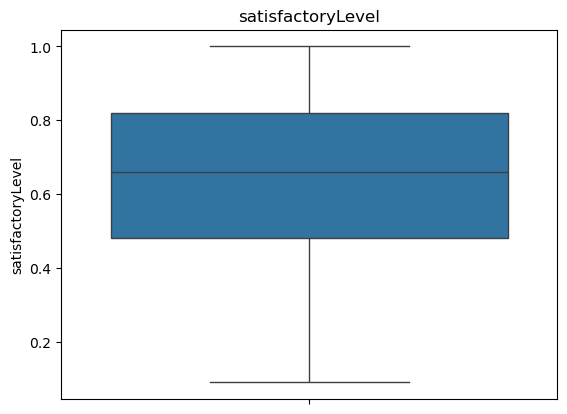

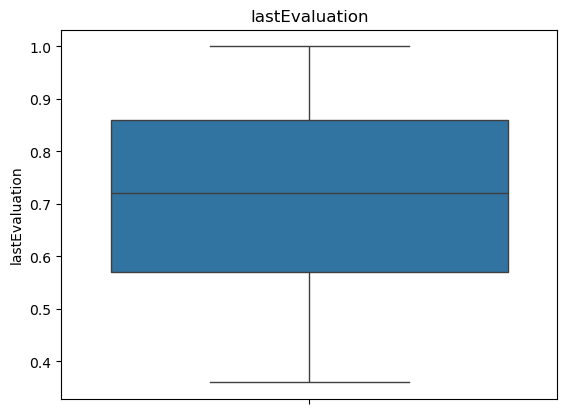

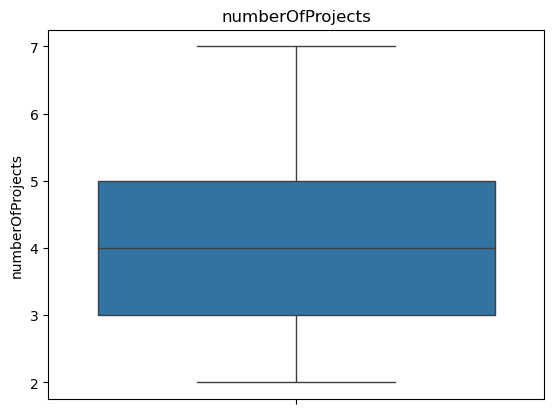

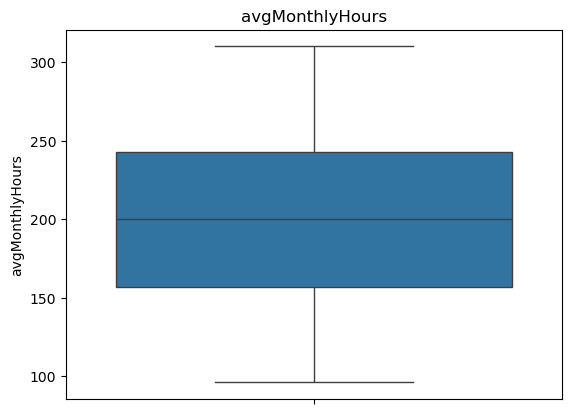

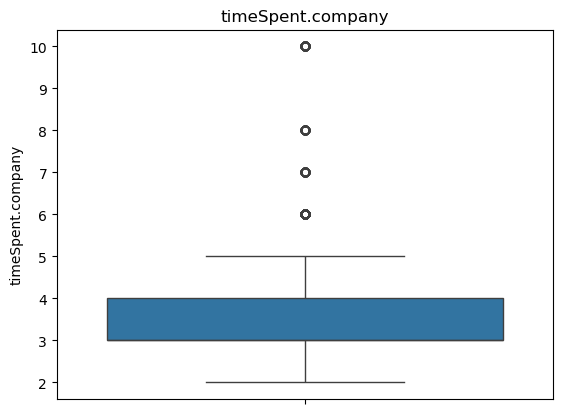

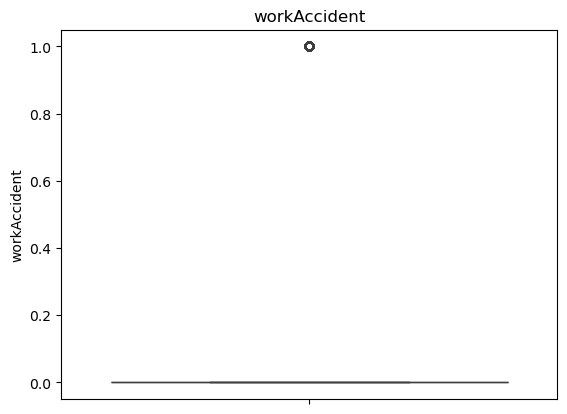

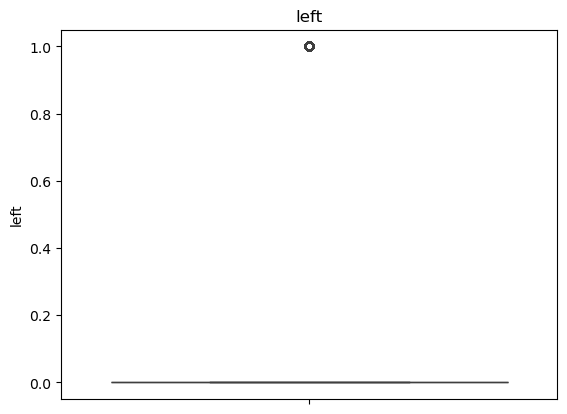

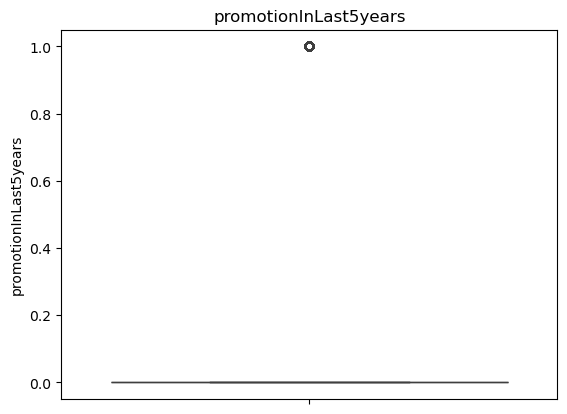

In [10]:
for col in df.select_dtypes(exclude='object'):
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

## **Understanding the problem statement:-**

### 🎯 **Updated 4 Business Questions for Analysis:**

These are tailored to the dataset structure and ideal for a fresher-level data analyst with basic Python + Pandas + Visualization skills.

Q1: How the no of projects is affecting the employee turnover(left)
Q2. How the salaries are affecting the employee turnover?
Q3. How the avg monthly working hours is affecting employee turnover?
Q4. Make subplots to figure out how: a. promotion is affecting employee turnover b. which dept's employees are leaving the most c. how work accident is affecting employee turn over

## **ANALYSIS:-**

### **Q1:  How the no of projects is affecting the employee turnover(left)**


In [16]:
df.groupby('numberOfProjects')['left'].value_counts()

numberOfProjects  left
2                 1        857
                  0        725
3                 0       3482
                  1         38
4                 0       3448
                  1        237
5                 0       1890
                  1        343
6                 0        455
                  1        371
7                 1        145
Name: count, dtype: int64

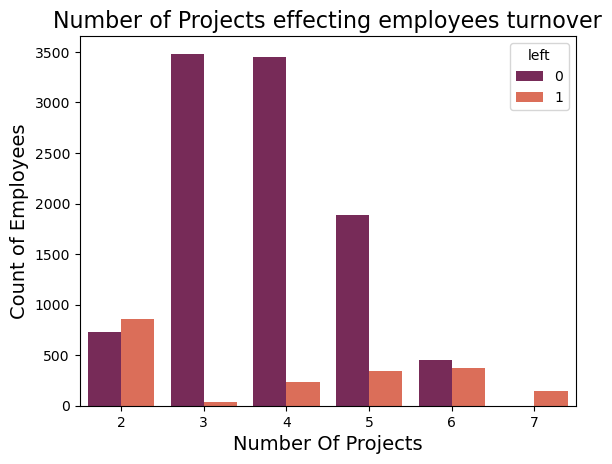

In [25]:
sns.countplot(data=df,x='numberOfProjects',hue='left',palette='rocket')
plt.title("Number of Projects effecting employees turnover",fontsize=16)
plt.xlabel("Number Of Projects",fontsize=14)
plt.ylabel("Count of Employees",fontsize=14)
plt.show()

Underwork (2 projects) and overwork (6+ projects) both seem to increase employee turnover. Balanced workload (3–4 projects) results in higher employee retention.


### **Q2. How the salaries are affecting the employee turnover?**

In [24]:
df.groupby('salary')['left'].value_counts()

salary  left
high    0        942
        1         48
low     0       4566
        1       1174
medium  0       4492
        1        769
Name: count, dtype: int64

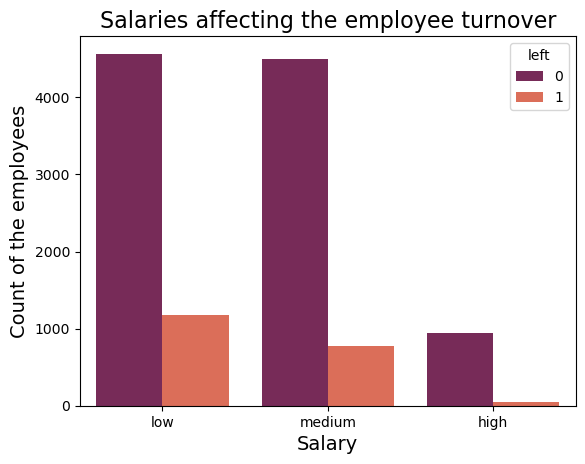

In [27]:
sns.countplot(data=df,x='salary',hue='left',palette='rocket')
plt.title('Salaries are affecting the employee turnover',fontsize=16)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count of the employees',fontsize)
plt.show()

**Employees with **low salaries tend to leave more frequently**, indicating that salary dissatisfaction significantly affects turnover.
Higher salary groups show **lower turnover rates**, suggesting that better pay improves employee retention.
**

### **Q3. How the avg monthly working hours is affecting employee turnover?**

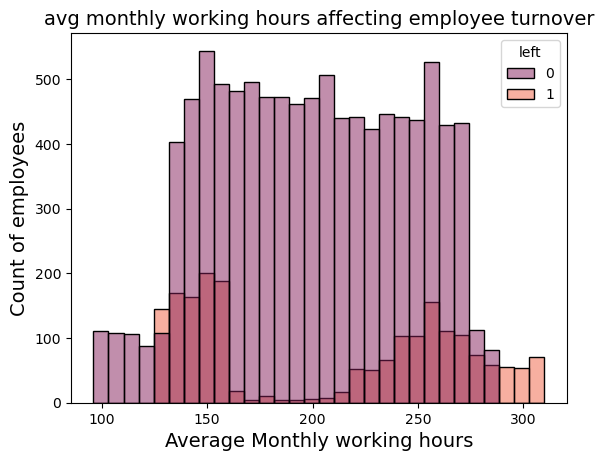

In [34]:
sns.histplot(data=df,x='avgMonthlyHours',hue='left',palette='rocket',bins=30)
plt.title("avg monthly working hours affecting employee turnover",fontsize=14)
plt.xlabel("Average Monthly working hours",fontsize=14)
plt.ylabel("Count of employees",fontsize=14)
plt.show()

Employees working **too few (<150 hours) or too many (>250 hours)** average monthly hours have a **higher turnover rate**, indicating that both underwork and overwork increase the risk of leaving.
The **150–250 hours/month range** appears optimal, where turnover is lowest, highlighting the importance of a balanced workload for retention.


## **Q4. Make subplots to figure out how: a. promotion is affecting employee turnover b. which dept's employees are leaving the most c. how work accident is affecting employee turn over**

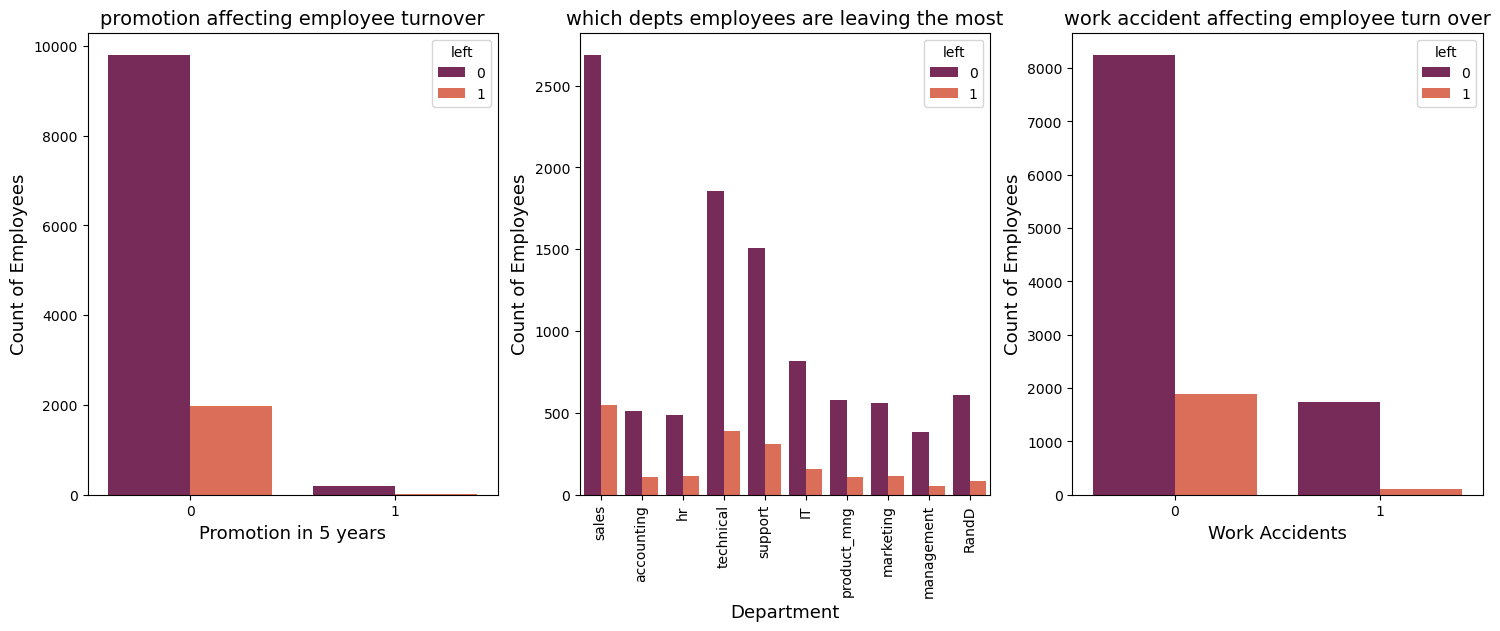

In [51]:
plt.subplots(1,3,figsize=(18,6))

plt.subplot(1,3,1)
sns.countplot(data=df,x='promotionInLast5years',hue='left',palette='rocket')
plt.title('promotion affecting employee turnover',fontsize=14)
plt.xlabel("Promotion in 5 years",fontsize=13)
plt.ylabel("Count of Employees",fontsize=13)

plt.subplot(1,3,2)
sns.countplot(data=df,x='dept',hue='left',palette='rocket')
plt.title('which depts employees are leaving the most',fontsize=14)
plt.xlabel("Department",fontsize=13)
plt.ylabel("Count of Employees",fontsize=13)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.countplot(data=df,x='workAccident',hue='left',palette='rocket')
plt.title('work accident affecting employee turn over',fontsize=14)
plt.xlabel("Work Accidents",fontsize=13)
plt.ylabel("Count of Employees",fontsize=13)

plt.show()




Employees **who received promotions** are less likely to leave, showing that growth opportunities reduce turnover.
Departments like **Sales and Technical** have the highest turnover rates.
Surprisingly, employees **who had work accidents left less**, indicating accidents don’t directly increase turnover risk.
